In [3]:
# We are going to build an Autoregressive Integrated Moving Average (ARIMA) model here to forecast future values.
# Lets analyze the individual components of ARIMA:

In [9]:
%matplotlib inline
import pandas as pd
data = pd.read_csv("E:\Pfolio\ARIMA\electrical_production.csv", index_col = 0)
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 1939-01-01 to 2020-11-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  983 non-null    float64
dtypes: float64(1)
memory usage: 15.4+ KB


In [11]:
# Right now our index is actually just a list of strings that look like a date, we'll want to adjust these to be timestamps, 
# that way our forecasting analysis will be able to interpret these values:

#Not true here.
#Was true in the original data set used by the author.

In [12]:
data.index = pd.to_datetime(data.index)

In [13]:
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [14]:
data.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01'],
              dtype='datetime64[ns]', name='DATE', length=983, freq=None)

In [15]:
# Now our data is in time series format

In [16]:
# Let's first make sure that the data doesn't have any missing data points:

In [17]:
data[pd.isnull(data['IPG2211A2N'])]

,IPG2211A2N
DATE,


In [18]:
# Let's also rename this column since its hard to remember what "IPG2211A2N" code stands for:

In [19]:
data.columns = ['Energy Production']

In [20]:
data.head()

,Energy Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [21]:
import chart_studio.plotly as ply
import cufflinks as cf

In [22]:
data.iplot(title = "Energy Production")

In [23]:
# Here we can see there is an upward trend. We can use statsmodels to perform a decomposition of this time series. 
# The decomposition of time series is a statistical task that deconstructs a time series into several components, each 
# representing one of the underlying categories of patterns. With statsmodels we will be able to see the trend, seasonal, 
# and residual components of our data.

# We can use an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be
# constant over time (e.g. every year we add 100 units of energy production). A multiplicative model is more appropriate when 
# we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of energy production everyyear).

# Based off the previous chart, it looks like the trend in these earlier days is slightly increasing at a higher rate 
# than just linear (although it is a bit hard to tell from this one plot, we can always experiment with additive versus
# multiplicative methods).

In [24]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

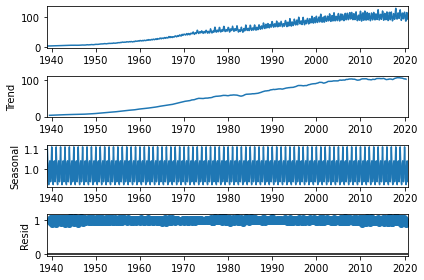

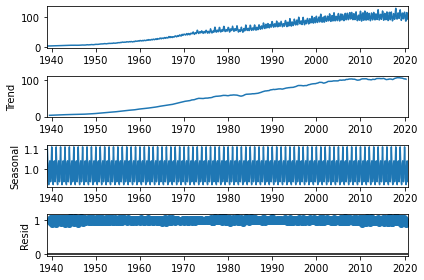

In [25]:
import pandas as pd
import numpy as np
import plotly.tools as tls
import plotly.express as px
import plotly.graph_objs as go
from chart_studio.plotly import plot_mpl
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model = 'multiplicative')
result.plot()

In [26]:
from statsmodels.tsa.stattools import adfuller
X = data.values
result = adfuller(X)
print('ADF Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %3.f' %(key, value))

ADF Statistic: -0.959834
p-value: 0.767631
Critical Values:
	1%:  -3
	5%:  -3
	10%:  -3


In [29]:
# The null hypothesis here is that alpha = 1.

# The p-value obtained should less than the significance level, 0.05, to reject the null hypothesis. Thereby inferring that
# the series is stationary.

In [30]:
# Since our p value is greater than the significance level we know that our time series is non-stationary.

In [32]:
import pmdarima as pm

In [33]:
from pmdarima import auto_arima

In [34]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print("AIC value is")
stepwise_model.aic()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3927.755, Time=1.57 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4442.589, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4274.299, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4043.456, Time=0.33 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=4228.739, Time=0.30 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3924.977, Time=0.78 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=4118.887, Time=0.64 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3889.218, Time=1.67 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=3991.156, Time=1.42 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=3870.341, Time=3.33 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3915.224, Time=2.44 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=3966.256, Time=3.26 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=4012.982, Time=3.28 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=3871.567, Time=3.96 sec
 ARIMA(1,1,2)(2,1,2

3870.341179882993

In [35]:
# We can then fit the stepwise_model object to a training data set. Because this is a time series forecast, we will “chop off” 
# a portion of our latest data and use that as the test set. Then we will train on the rest of the data and forecast into the 
# future. Afterwards we can compare our forecast with the section of data we chopped off.

# Train data set has values from 01-01-1939 to 01-12-2016
# Test data set has value from 01-01-2017 to 01-11-2020

# We will train on the train data set and forecast on the dates after that and compare it to our real test data.

In [36]:
train = data.loc['1939-01-01': '2016-12-01']
test = data.loc['2017-01-01':]

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2017-01-01 to 2020-11-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Energy Production  47 non-null     float64
dtypes: float64(1)
memory usage: 752.0 bytes


In [38]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [39]:
future_forecast = stepwise_model.predict(n_periods = 47)
print(future_forecast)

[122.3229939  110.58589002 100.29876244  90.26658269  91.94629517
 103.59046128 113.70168157 112.87275978 101.34712152  91.83109747
  95.69034412 111.68310471 121.32057043 111.08344323 101.64160508
  90.43693895  92.33521717 103.51532491 113.40799226 112.11909315
 101.56287931  92.26485719  96.57402243 110.48617086 121.26118541
 111.5251944  101.88004642  90.55137455  92.37047078 103.71296706
 113.56395372 112.45249837 102.16157261  92.53747401  96.63826013
 110.38280075 121.66488326 111.91823228 101.90348928  90.78263016
  92.48621208 104.06927636 113.94510406 113.08449664 102.74334867
  92.81920663  96.64853785]


In [40]:
future_forecast1 = pd.DataFrame(future_forecast, index = test.index, columns = ['Prediction'])
future_forecast1.iplot()

In [ ]:
final = test.append(future_forecast1)

In [ ]:
final.iplot()